In [1]:
import random
import torch
from d2l import torch as d2l

%matplotlib inline

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 1, y.shape)
    
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print(features[0], labels[0])

tensor([-0.6379, -0.1143]) tensor([4.9557])


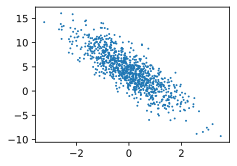

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1], labels, 1);

In [10]:
def data_iter(batch_size, features, labels, is_train=True):
    num_examples = len(features)
    indices = list(range(num_examples))
    if is_train:
        random.shuffle(indices)
    
#     num_batch = num_examples // batch_size + 1
    for i in range(0, num_examples, batch_size):
        batch_indics = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indics], labels[batch_indics]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.1509,  0.0467],
        [-0.8108,  1.0422],
        [-1.3051, -0.1372],
        [ 1.0312, -0.4302],
        [ 0.1274,  0.3512],
        [ 1.8181,  0.1965],
        [ 1.0296,  0.2412],
        [ 0.5309, -0.2859],
        [-0.1696, -1.3781],
        [-1.2657, -0.9809]]) 
 tensor([[ 5.8687],
        [-0.9661],
        [ 2.2321],
        [ 7.2845],
        [ 3.5055],
        [ 7.0392],
        [ 7.1190],
        [ 6.3367],
        [ 9.1078],
        [ 5.2951]])


In [ ]:
# init params
